In [1]:
'''
Description: This program generates a sinewave, quantizes it and does various signal processing techniques on it
Author: Hani Roshan CK
Date: 21/02/2023
'''

'\nDescription: This program generates a sinewave, quantizes it and does various signal processing techniques on it\nAuthor: Hani Roshan CK\nDate: 21/02/2023\n'

In [2]:
'''
Hani Roshan CK
27
Electronics and Communication
'''

'\nHani Roshan CK\n27\nElectronics and Communication\n'

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
Fs=250
freq=4
t=np.arange(0,2,1/Fs)
sinewave=((27%5)+1)*(1+np.cos(2*np.pi*freq*t))/2

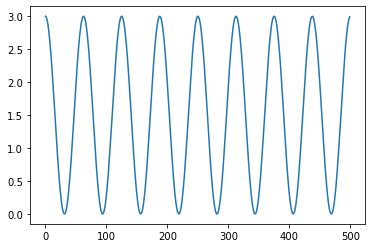

In [59]:
plt.plot(sinewave)

In [60]:
'''Description: It plots the quantized output of a signal fed to it at a quantization level L.
    L-Quantization level
    sinewave-the signal to be quantized
'''
def quant(L, sinewave):
    stepsize=(max(sinewave)-min(sinewave))/L
    sinqua=np.round(sinewave/stepsize)*stepsize
    plt.plot(t,sinqua)

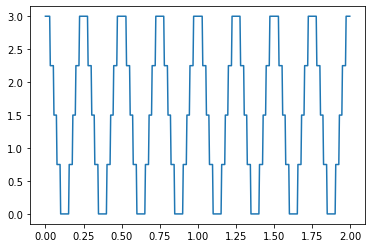

In [61]:
quant(4,sinewave)

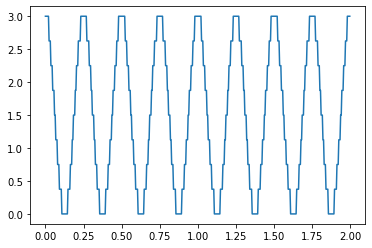

In [62]:
quant(8,sinewave)

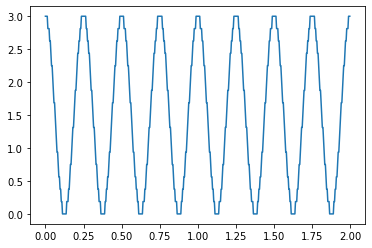

In [63]:
quant(16,sinewave)

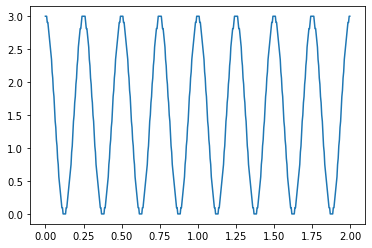

In [64]:
quant(32,sinewave)

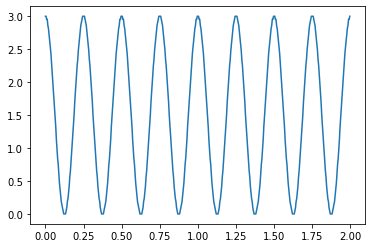

In [65]:
quant(64,sinewave)

In [66]:
#a
'''Description: It gives the quantization noise ratio of a signal fed to it at a quantization level L.
    L-Quantization level
    sinewave-the signal to be quantized
'''
def quante(L, sinewave):
    stepsize=(max(sinewave)-min(sinewave))/L
    sinqua=np.round(sinewave/stepsize)*stepsize
    e=sinewave-sinqua
    noise_power=np.var(e)
    signal_power=np.var(sinewave)
    sqnr=10*np.log10(signal_power / noise_power)
    return sqnr

In [67]:
level=np.array([4,8,16,32,64])
sin=[0]*len(level)
for i in range(len(sin)):
    sin[i]=quante(level[i],sinewave)

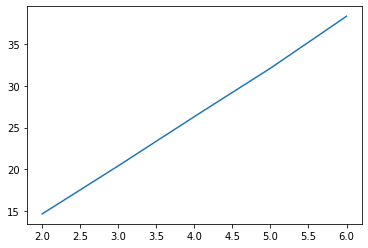

In [68]:
level=np.array([4,8,16,32,64])
N=np.log2(level)
plt.plot(N,sin)

In [69]:
#b
'''Description: It gives the quantized output of a signal fed to it at a quantization level L.
    L-Quantization level
    sinewave-the signal to be quantized
'''
def quant(L, sinewave):
    stepsize=(max(sinewave)-min(sinewave))/L
    sinqua=np.round(sinewave/stepsize)*stepsize
    return sinqua

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


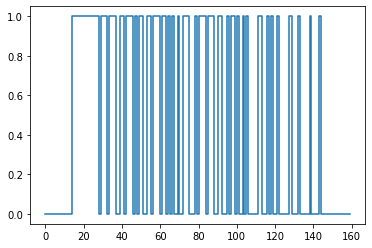

In [70]:
p=quant(32,sinewave)
n=5
stepsize=(max(sinewave)-min(sinewave))/32
bin=[0]*33
x=[0]*33
for i in range(32):
    bin[i]=format(i, '0{:}b'.format(5))
binary=np.array(bin)
x=binary[(p/stepsize).astype(int)]
pulsestr=[0]*32
for i in range(len(pulsestr)):
    pulsestr[i]='0'*(5-len(x[i]))+x[i]
pulsevalstr=[0]*5*32
pulseval=[0]*5*32
i=0
k=0
j=0
while k<len(pulseval):
    pulsevalstr[k]=pulsestr[i][j]
    if j>=4:
        j=0
        i=i+1
        k=k+1
    else:
        j=j+1
        k=k+1
pulseval=[0]*160
for i in range(len(pulseval)):
    pulseval[i]=int(pulsevalstr[i])
q=np.arange(len(pulseval))
print(pulseval)
plt.step(q,pulseval)